In [6]:
import requests
from urllib.parse import urlencode
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import json

In [7]:
token="Jqi8dLve7H7ixzmh0XQirKjB4miSf2Tnre3khV8y"

In [8]:
# first author papers
encoded_query_first = urlencode({"q": "first_author:peca, alessandro",
                           "fl": "title, author, date, citation_count, bibcode",
                           "rows": 200
                          })

response_first = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query_first), \
                       headers={'Authorization': 'Bearer ' + token})

# format the response in a nicely readable format
results_first = response_first.json()



# all papers
encoded_query_all = urlencode({"q": "author:peca, alessandro",
                           "fl": "title, author, date, citation_count, bibcode",
                           "rows": 200
                          })

response_all = requests.get("https://api.adsabs.harvard.edu/v1/search/query?{}".format(encoded_query_all), \
                       headers={'Authorization': 'Bearer ' + token})

# format the response in a nicely readable format
results_all = response_all.json()

# save it
with open('data/ads_data.json', 'w') as f:
    json.dump(results_all, f, indent=4)


Total papers: 5
Total citations: 42
H-index: 2
Total papers: 19
Total citations: 145
H-index: 7


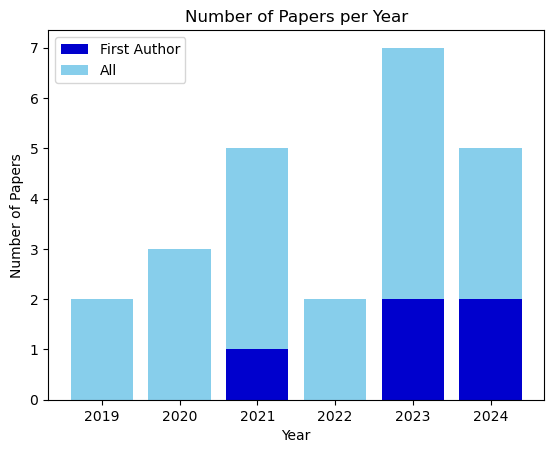

In [9]:
data_per_year = {}
citation_counts_all = []

for j, results in enumerate([results_first, results_all]):
    filtered_papers = [
        paper for paper in results['response']['docs']
        if any(sub in paper['bibcode'] for sub in ['ApJ', 'arXiv', 'Univ', 'A&A', 'Galax'])
    ]

    papers = filtered_papers
    titles = [paper['title'][0] for paper in filtered_papers]
    authors = [paper['author'] for paper in filtered_papers]
    dates = [datetime.strptime(paper['date'], '%Y-%m-%dT%H:%M:%S%z').date() for paper in filtered_papers]
    citation_counts = [paper['citation_count'] for paper in filtered_papers]

    # Number of papers per year
    years = [date.year for date in dates]
    unique_years = sorted(set(years))

    for year in unique_years:
        if year not in data_per_year:
            data_per_year[year] = [0, 0]
        data_per_year[year][j] = years.count(year)
    citation_counts_all.append(citation_counts)

    print("Total papers:", len(papers))
    print("Total citations:", np.sum(citation_counts))


    # Compute the H-index
    citation_counts_sorted = sorted(citation_counts, reverse=True)
    h_index = 0
    for i, citations in enumerate(citation_counts_sorted):
        if citations >= i + 1:
            h_index = i + 1
        else:
            break

    print(f"H-index: {h_index}")


 
years = sorted(data_per_year.keys())
num_papers_first = [data_per_year[year][0] for year in years]
num_papers_all = [data_per_year[year][1] for year in years]

fig, axs = plt.subplots()
# Plot number of papers per year as a stacked bar chart
axs.bar(years, num_papers_first, color='mediumblue', label='First Author')
axs.bar(years, num_papers_all, bottom=num_papers_first, color='skyblue', label='All')
axs.set_title('Number of Papers per Year')
axs.set_xlabel('Year')
axs.set_ylabel('Number of Papers')
axs.legend()




In [10]:
papers

[{'bibcode': '2023ApJ...943..162P',
  'author': ['Peca, Alessandro',
   'Cappelluti, Nico',
   'Urry, C. Megan',
   'LaMassa, Stephanie',
   'Marchesi, Stefano',
   'Ananna, Tonima Tasnim',
   'Baloković, Mislav',
   'Sanders, David',
   'Auge, Connor',
   'Treister, Ezequiel',
   'Powell, Meredith',
   'Turner, Tracey Jane',
   'Kirkpatrick, Allison',
   'Tian, Chuan'],
  'date': '2023-02-01T00:00:00Z',
  'title': ['On the Cosmic Evolution of AGN Obscuration and the X-Ray Luminosity Function: XMM-Newton and Chandra Spectral Analysis of the 31.3 deg<SUP>2</SUP> Stripe 82X'],
  'citation_count': 27},
 {'bibcode': '2024arXiv240320160L',
  'author': ['LaMassa, Stephanie M.',
   'Peca, Alessandro',
   'Urry, C. Megan',
   'Glikman, Eilat',
   'Ananna, Tonima Tasnim',
   'Auge, Connor',
   'Civano, Francesca',
   'Ghosh, Aritra',
   'Kirkpatrick, Allison',
   'Koss, Michael J.',
   'Powell, Meredith',
   'Salvato, Mara',
   'Trakhtenbrot, Benny'],
  'date': '2024-03-01T00:00:00Z',
  'title'